In [11]:
import pandas as pd
import numpy as py
import seaborn as sns
from sklearn.datasets import load_iris

### Load the Iris Dataset

The Iris dataset contains 150 samples of iris flowers, categorized into three species:

-Setosa
-Versicolor
-Virginica

Since clustering is an unsupervised learning task, we drop the species column because we won’t use labeled data.


In [13]:
iris = load_iris()

In [16]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [18]:
# Display first few rows

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [24]:
list(df)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Clustering Algorithm Implementation

We will implement two clustering algorithms:
✅ K-Means Clustering 
✅ Hierarchical Clustering 

### How K-Means Clustering Works?

K-Means is an unsupervised learning algorithm that partitions data into K clusters.

The algorithm:

Randomly selects K centroids.
-Assigns each data point to the nearest centroid.
-Updates the centroids based on the new cluster assignments.
-Repeats until convergence (i.e., centroids stop changing).


### Why is K-Means Suitable for the Iris Dataset?

The Iris dataset has three distinct species, making it ideal for K=3 clusters.

The data is well-structured, making it easy to group into separate clusters.

It is efficient and works well with numerical features.

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters=3) # Example with 3 clusters
df['Cluster'] = kmeans.fit_predict(df)

C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


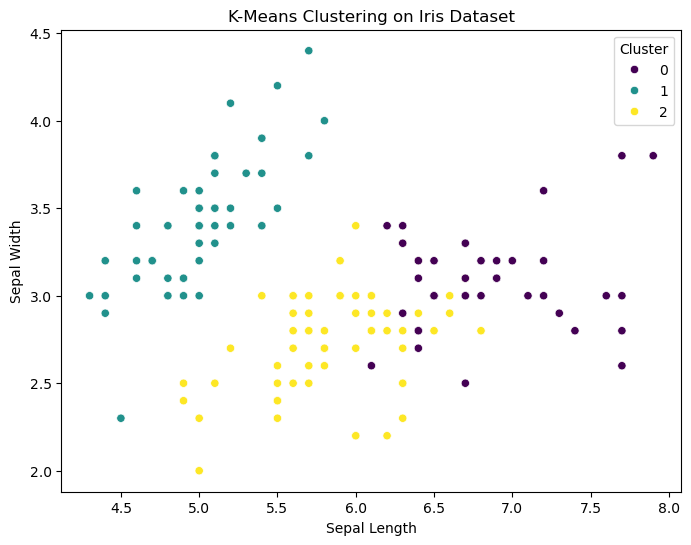

In [32]:
# Visualizing Clusters using Sepal Length and Sepal Width

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["Cluster"], palette="viridis")
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Cluster")
plt.show()

 ### How Hierarchical Clustering Works?
Hierarchical clustering does not require specifying K clusters.
It creates a dendrogram, which is a tree-like structure that shows how clusters are merged.
Two main types:
.


## 📌 Why is Hierarchical Clustering Suitable for the Iris Dataset?
It is more interpretable as we can visualize the clusters using a dendrogram.
It helps determine the optimal number of clusters based on linkage distances

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create Linkage Matrix for Dendrogram
linkage_matrix = linkage(df.iloc[:, :-1], method="ward")


In [36]:
# Apply Agglomerative Clustering with 3 clusters

hierarchical = AgglomerativeClustering(n_clusters=3)
df["H_Cluster"] = hierarchical.fit_predict(df.iloc[:, :-2])

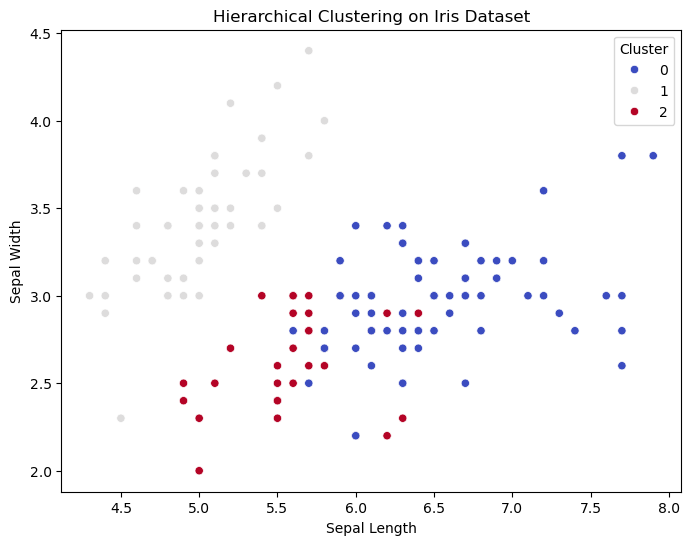

In [38]:
# Visualizing Clusters using Sepal Length and Sepal Width

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["H_Cluster"], palette="coolwarm")
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Cluster")
plt.show()

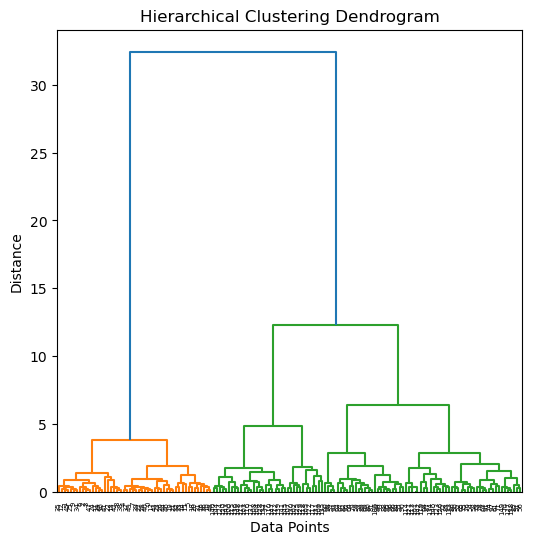

In [42]:
# Plot Dendrogram
plt.figure(figsize=(6, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
